In [1]:
# importing required values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# read the train data
train_data = pd.read_csv('train_v9rqX0R.csv')

In [6]:
# check for the null values
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# impute missing values in item weight by mean
train_data.Item_Weight.fillna(train_data.Item_Weight.mean(),inplace=True)
# impute outlet size in training data by mode
train_data.Outlet_Size.fillna(train_data.Outlet_Size.mode()[0],inplace=True)


In [9]:
import category_encoders as ce
# create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['Item_Fat_Content',
                             'Item_Type',
                             'Outlet_Identifier',
                             'Outlet_Size',
                             'Outlet_Location_Type',
                             'Outlet_Type'],use_cat_names=True)
# encode the categorical variables
train_data = OHE.fit_transform(train_data)



In [11]:
from sklearn.preprocessing import StandardScaler
# create an object of the StandardScaler
scaler = StandardScaler()
# fit with the Item_MRP
scaler.fit(np.array(train_data.Item_MRP).reshape(-1,1))
# transform the data
train_data.Item_MRP = scaler.transform(np.array(train_data.Item_MRP).reshape(-1,1))

In [12]:
# importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# separate the independent and target variable 
train_X = train_data.drop(columns=['Item_Identifier','Item_Outlet_Sales'])
train_Y = train_data['Item_Outlet_Sales']


# randomly split the data
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y,test_size=0.25,random_state=0)


# shape of train and test splits
train_x.shape, test_x.shape, train_y.shape, test_y.shape


((6392, 45), (2131, 45), (6392,), (2131,))

In [13]:
# create an object of the LinearRegression Model
model_LR = LinearRegression()


# fit the model with the training data
model_LR.fit(train_x, train_y)


# predict the target on train and test data 
predict_train = model_LR.predict(train_x)
predict_test  = model_LR.predict(test_x)


# Root Mean Squared Error on train and test date
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))


RMSE on train data:  1120.3887086594239
RMSE on test data:  1148.8547727689513


In [14]:
# create an object of the RandomForestRegressor
model_RFR = RandomForestRegressor(max_depth=10)


# fit the model with the training data
model_RFR.fit(train_x, train_y)


# predict the target on train and test data
predict_train = model_RFR.predict(train_x)
predict_test = model_RFR.predict(test_x)


# Root Mean Squared Error on train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test)**(0.5))


RMSE on train data:  896.427603169651
RMSE on test data:  1118.1986857923057


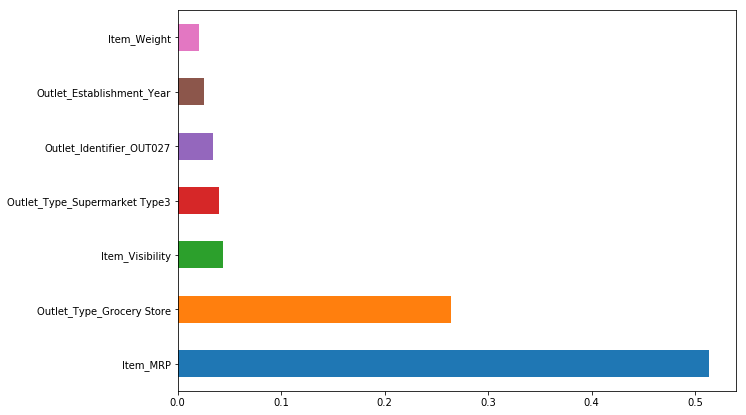

In [15]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(model_RFR.feature_importances_, index = train_x.columns)
feat_importances.nlargest(7).plot(kind='barh');


In [17]:
# training data with 7 most important features
train_x_if = train_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                   'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                  'Item_Weight']]

In [18]:
# test data with 7 most important features
test_x_if = test_x[['Item_MRP', 
                    'Outlet_Type_Grocery Store',
                    'Item_Visibility',
                    'Outlet_Type_Supermarket Type3',
                    'Outlet_Identifier_OUT027',
                    'Outlet_Establishment_Year',
                    'Item_Weight']]

In [19]:
# create an object of the RandfomForestRegressor Model
model_RFR_with_if = RandomForestRegressor(max_depth=10,random_state=2)
# fit the model with the training data
model_RFR_with_if.fit(train_x_if, train_y)
# predict the target on the training and test data
predict_train_with_if = model_RFR_with_if.predict(train_x_if)
predict_test_with_if = model_RFR_with_if.predict(test_x_if)
# Root Mean Squared Error on the train and test data
print('RMSE on train data: ', mean_squared_error(train_y, predict_train_with_if)**(0.5))
print('RMSE on test data: ',  mean_squared_error(test_y, predict_test_with_if)**(0.5))


RMSE on train data:  899.9916554012883
RMSE on test data:  1117.6036288757123
